### Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Import & Initial Munging
* Data was pulled from the bigquery pushshift.io dataset via SQL, with author, subreddit and count of number of posts from 2018
* Full SQL query:
    * SELECT author, subreddit, count(subreddit) FROM [fh-bigquery.reddit_posts.2018_12] WHERE author != "[deleted]" AND subreddit IS NOT NULL GROUP BY author, subreddit
* Included all months for 2018 within SQL query


In [4]:
#import data, 3 files with all 2018 posts split into between
raw_data_1 = pd.read_csv('/Users/samholt/GA/Capstone_Data_MKII/Capstone_MKII_Data_1.csv', sep = ",")
raw_data_2 = pd.read_csv('/Users/samholt/GA/Capstone_Data_MKII/Capstone_MKII_Data_2.csv', sep = ",")
raw_data_3 = pd.read_csv('/Users/samholt/GA/Capstone_Data_MKII/Capstone_MKII_Data_3.csv', sep = ",")

In [5]:
# merge dataframe
df_first = pd.merge(raw_data_1, raw_data_2, on=["author", "subreddit"], how= "outer" )
df= pd.merge(raw_data_3, df_first, on=["author", "subreddit"], how= "outer" )

In [6]:
#  checking to see how the merge has gone, need to deal with null values
df.head()

,author,subreddit,f0_,f0__x,f0__y
0,businessbrand121,business,8.0,NaN,NaN
1,GenericManChild,starbound,9.0,1.0,1.0
2,AutoModerator,AroundTheNFL,9.0,8.0,9.0
3,sleepinzombie,iphone,8.0,1.0,NaN
4,switchnbitch,GonewildAudible,8.0,NaN,7.0


In [7]:
#dealing with null values with 0 as they mean a user hasn't posted to that subreddit in one of the three periods
df.fillna(0, inplace= True)

In [8]:
# create one variable with overall count of posts per subreddit per user
df["posts"] = df["f0_"] + df["f0__x"] + df["f0__y"]

In [9]:
#drop the remaining variables
df.drop(labels= ['f0_', 'f0__x', 'f0__y'], inplace= True, axis= 1)

In [10]:
#check for null values, 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40347434 entries, 0 to 40347433
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   author     object 
 1   subreddit  object 
 2   posts      float64
dtypes: float64(1), object(2)
memory usage: 1.2+ GB


In [14]:
df.shape

(40347434, 3)

In [12]:
num_authors = len(df["author"].unique())
num_subreddits = len(df["subreddit"].unique())
num_posts = df["posts"].sum()

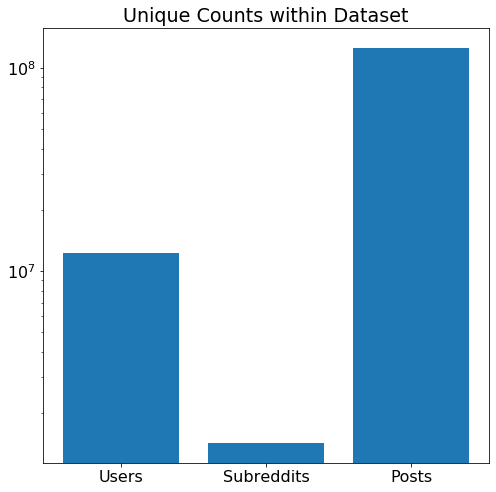

In [15]:
labels = [num_authors, num_subreddits, num_posts]
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (8, 8))
plt.bar(x = ["Users", "Subreddits", "Posts"], height= labels, log = True)
plt.title("Unique Counts within Dataset")
plt.show()